In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
pd.DataFrame({'count':df.isnull().sum(),'percentage':df.isnull().sum()/len(df)*100})

,count,percentage
customerID,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0


In [8]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

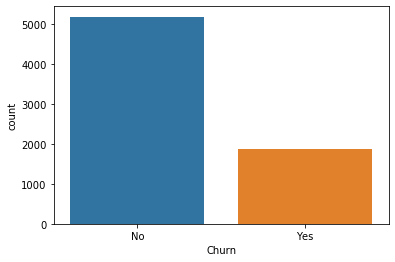

In [9]:
sns.countplot(x='Churn',data=df)

In [10]:
df.drop(['customerID'],axis=1,inplace=True)

In [11]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

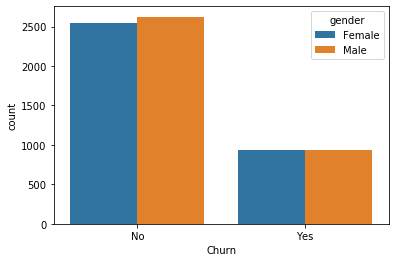

In [12]:
sns.countplot(x='Churn',hue='gender',data=df)

In [13]:
df['SeniorCitizen'].unique()

array([0, 1])

In [14]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

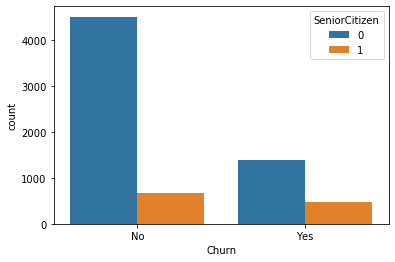

In [15]:
sns.countplot(x='Churn',hue='SeniorCitizen',data=df)

In [16]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

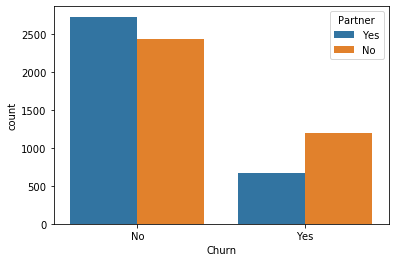

In [18]:
sns.countplot(x='Churn',hue='Partner',data=df)

In [19]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

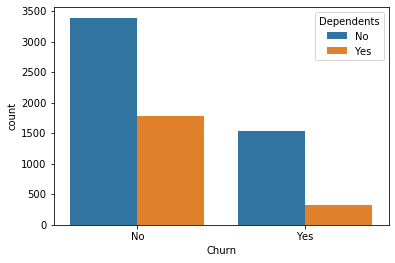

In [21]:
sns.countplot(x='Churn',hue='Dependents',data=df)

In [22]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

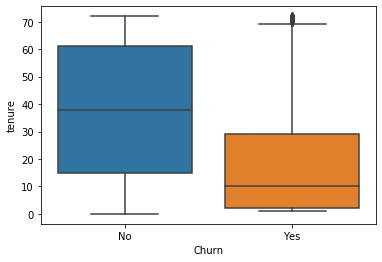

In [23]:
sns.boxplot(y='tenure',x='Churn',data=df)

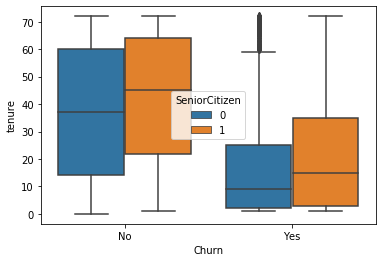

In [24]:
sns.boxplot(y='tenure',x='Churn',hue='SeniorCitizen',data=df)

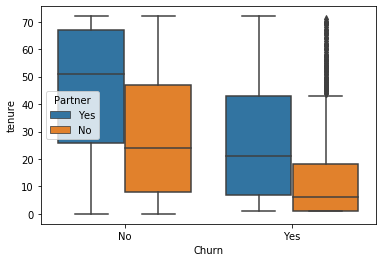

In [25]:
sns.boxplot(y='tenure',x='Churn',hue='Partner',data=df)

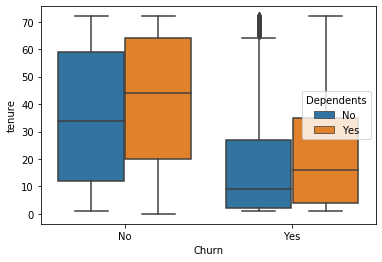

In [26]:
sns.boxplot(y='tenure',x='Churn',hue='Dependents',data=df)

In [27]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [28]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

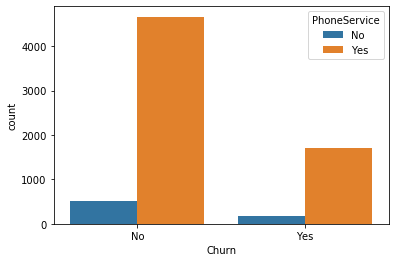

In [29]:
sns.countplot(x='Churn',hue='PhoneService',data=df)

In [30]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [31]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

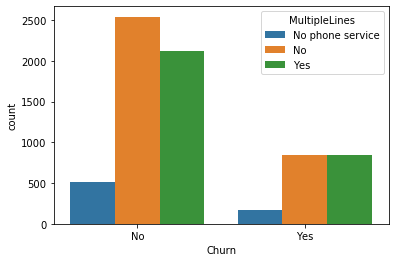

In [32]:
sns.countplot(x='Churn',hue='MultipleLines',data=df)

In [33]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [34]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

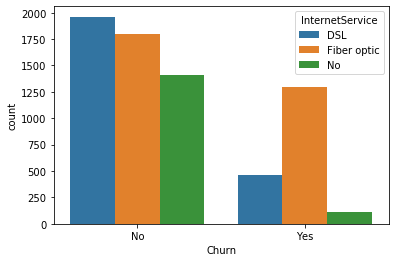

In [35]:
sns.countplot(x='Churn',hue='InternetService',data=df)

In [36]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [37]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

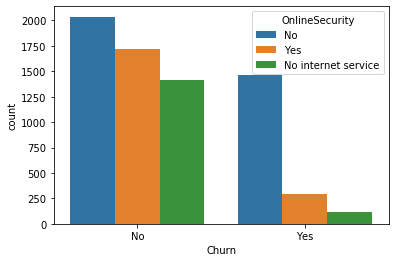

In [38]:
sns.countplot(x='Churn',hue='OnlineSecurity',data=df)

In [39]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [40]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

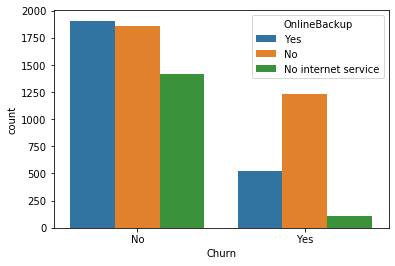

In [41]:
sns.countplot(x='Churn',hue='OnlineBackup',data=df)

In [42]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [43]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

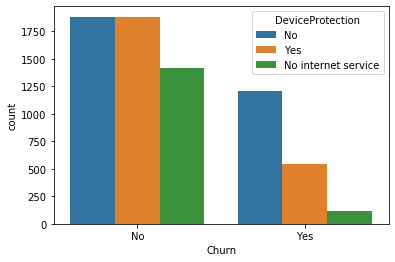

In [44]:
sns.countplot(x='Churn',hue='DeviceProtection',data=df)

In [45]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [46]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

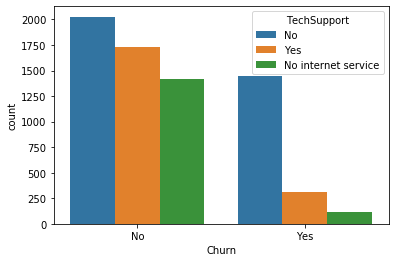

In [47]:
sns.countplot(x='Churn',hue='TechSupport',data=df)

In [48]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [49]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

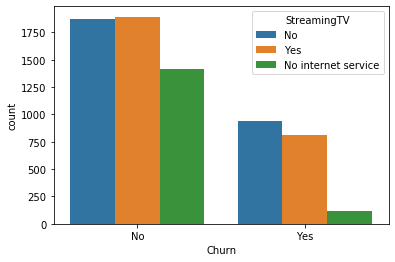

In [50]:
sns.countplot(x='Churn',hue='StreamingTV',data=df)

In [51]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [52]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

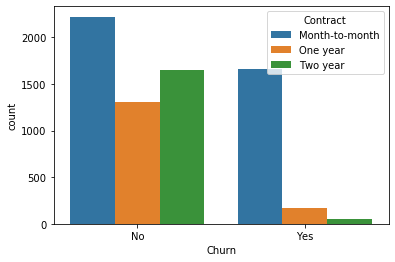

In [53]:
sns.countplot(x='Churn',hue='Contract',data=df)

In [54]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [55]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

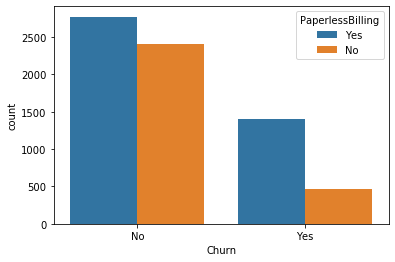

In [56]:
sns.countplot(x='Churn',hue='PaperlessBilling',data=df)

In [57]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [58]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

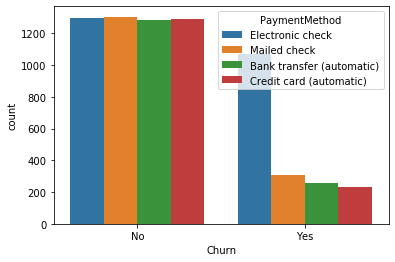

In [59]:
sns.countplot(x='Churn',hue='PaymentMethod',data=df)

In [60]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

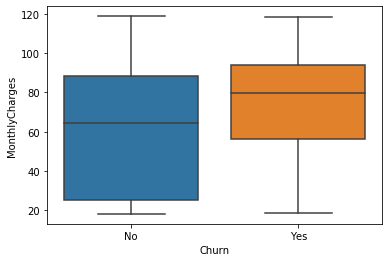

In [61]:
sns.boxplot(y='MonthlyCharges',x='Churn',data=df)

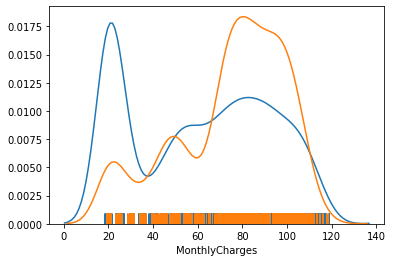

In [62]:
target_0 = df.loc[df['Churn'] == 'No']
target_1 = df.loc[df['Churn'] == 'Yes']
sns.distplot(target_0['MonthlyCharges'],hist=False, rug=True)
sns.distplot(target_1['MonthlyCharges'],hist=False, rug=True)
plt.show()

In [63]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

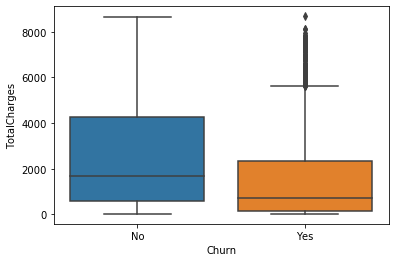

In [64]:
sns.boxplot(y='TotalCharges',x='Churn',data=df)

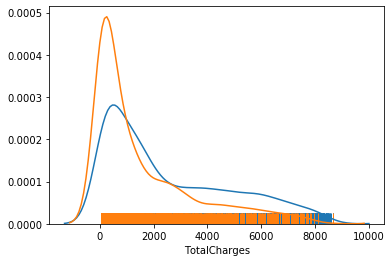

In [65]:
target_0 = df.loc[df['Churn'] == 'No']
target_1 = df.loc[df['Churn'] == 'Yes']
sns.distplot(target_0['TotalCharges'],hist=False, rug=True)
sns.distplot(target_1['TotalCharges'],hist=False, rug=True)
plt.show()

In [66]:
df.drop(['PhoneService','InternetService'],axis=1,inplace=True)

In [67]:
df['MonthlyCharges']=(df['MonthlyCharges']-df['MonthlyCharges'].min())/(df['MonthlyCharges'].max()-df['MonthlyCharges'].min())

df['TotalCharges']=(df['TotalCharges']-df['TotalCharges'].min())/(df['TotalCharges'].max()-df['TotalCharges'].min())

df['tenure']=(df['tenure']-df['tenure'].min())/(df['tenure'].max()-df['tenure'].min())


In [68]:
gle = LabelEncoder()
gender_labels = gle.fit_transform(df['gender'])
gender_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
df['gender'] = gender_labels

In [69]:
gender_mappings

{0: 'Female', 1: 'Male'}

In [70]:
Partner_labels = gle.fit_transform(df['Partner'])
Partner_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
df['Partner'] = Partner_labels

In [71]:
Partner_mappings

{0: 'No', 1: 'Yes'}

In [72]:
Dependents_labels = gle.fit_transform(df['Dependents'])
Dependents_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
df['Dependents'] = Dependents_labels

In [73]:
Dependents_mappings

{0: 'No', 1: 'Yes'}

In [74]:
MultipleLines_labels = gle.fit_transform(df['MultipleLines'])
MultipleLines_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
df['MultipleLines'] = MultipleLines_labels

In [75]:
MultipleLines_mappings

{0: 'No', 1: 'No phone service', 2: 'Yes'}

In [76]:
OnlineSecurity_labels = gle.fit_transform(df['OnlineSecurity'])
OnlineSecurity_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
df['OnlineSecurity'] = OnlineSecurity_labels

In [77]:
OnlineSecurity_mappings

{0: 'No', 1: 'No internet service', 2: 'Yes'}

In [78]:
OnlineBackup_labels = gle.fit_transform(df['OnlineBackup'])
OnlineBackup_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
df['OnlineBackup'] = OnlineBackup_labels

In [79]:
OnlineBackup_mappings

{0: 'No', 1: 'No internet service', 2: 'Yes'}

In [80]:
DeviceProtection_labels = gle.fit_transform(df['DeviceProtection'])
DeviceProtection_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
df['DeviceProtection'] = DeviceProtection_labels


In [81]:
DeviceProtection_mappings

{0: 'No', 1: 'No internet service', 2: 'Yes'}

In [82]:
TechSupport_labels = gle.fit_transform(df['TechSupport'])
TechSupport_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
df['TechSupport'] = TechSupport_labels

In [83]:
TechSupport_mappings

{0: 'No', 1: 'No internet service', 2: 'Yes'}

In [84]:
StreamingTV_labels = gle.fit_transform(df['StreamingTV'])
StreamingTV_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
df['StreamingTV'] = StreamingTV_labels


In [85]:
StreamingTV_mappings

{0: 'No', 1: 'No internet service', 2: 'Yes'}

In [86]:
StreamingMovies_labels = gle.fit_transform(df['StreamingMovies'])
StreamingMovies_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
df['StreamingMovies'] = StreamingMovies_labels

In [87]:
StreamingMovies_mappings

{0: 'No', 1: 'No internet service', 2: 'Yes'}

In [88]:
Contract_labels = gle.fit_transform(df['Contract'])
Contract_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
df['Contract'] = Contract_labels

In [89]:
Contract_mappings

{0: 'Month-to-month', 1: 'One year', 2: 'Two year'}

In [90]:
PaperlessBilling_labels = gle.fit_transform(df['PaperlessBilling'])
PaperlessBilling_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
df['PaperlessBilling'] = PaperlessBilling_labels

In [91]:
PaperlessBilling_mappings

{0: 'No', 1: 'Yes'}

In [92]:
PaymentMethod_labels = gle.fit_transform(df['PaymentMethod'])
PaymentMethod_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
df['PaymentMethod'] = PaymentMethod_labels

In [93]:
PaymentMethod_mappings

{0: 'Bank transfer (automatic)',
 1: 'Credit card (automatic)',
 2: 'Electronic check',
 3: 'Mailed check'}

In [94]:
Churn_labels = gle.fit_transform(df['Churn'])
Churn_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
df['Churn'] = Churn_labels

In [95]:
Churn_mappings 

{0: 'No', 1: 'Yes'}

In [96]:
SeniorCitizen_labels = gle.fit_transform(df['SeniorCitizen'])
SeniorCitizen_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
df['SeniorCitizen'] = SeniorCitizen_labels

In [97]:
SeniorCitizen_mappings

{0: 0, 1: 1}

In [98]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.0,0.000000,1.000000,1.000000,1.0
SeniorCitizen,7043.0,0.162147,0.368612,0.0,0.000000,0.000000,0.000000,1.0
Partner,7043.0,0.483033,0.499748,0.0,0.000000,0.000000,1.000000,1.0
Dependents,7043.0,0.299588,0.458110,0.0,0.000000,0.000000,1.000000,1.0
tenure,7043.0,0.449599,0.341104,0.0,0.125000,0.402778,0.763889,1.0
MultipleLines,7043.0,0.940508,0.948554,0.0,0.000000,1.000000,2.000000,2.0
OnlineSecurity,7043.0,0.790004,0.859848,0.0,0.000000,1.000000,2.000000,2.0
OnlineBackup,7043.0,0.906432,0.880162,0.0,0.000000,1.000000,2.000000,2.0
DeviceProtection,7043.0,0.904444,0.879949,0.0,0.000000,1.000000,2.000000,2.0
TechSupport,7043.0,0.797104,0.861551,0.0,0.000000,1.000000,2.000000,2.0


In [99]:
df1=df.copy()

In [100]:
corr_matrix=df1.corr()
corr_matrix['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199484
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

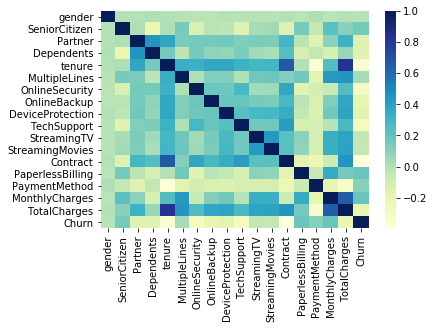

In [101]:
sns.heatmap(corr_matrix, cmap="YlGnBu")

In [102]:
corr_matrix['tenure'].sort_values(ascending=False)

tenure              1.000000
TotalCharges        0.825880
Contract            0.671607
Partner             0.379697
DeviceProtection    0.371105
OnlineBackup        0.370876
MultipleLines       0.343032
OnlineSecurity      0.325468
TechSupport         0.322942
StreamingMovies     0.296866
StreamingTV         0.289373
MonthlyCharges      0.247900
Dependents          0.159712
SeniorCitizen       0.016567
PaperlessBilling    0.006152
gender              0.005106
Churn              -0.352229
PaymentMethod      -0.370436
Name: tenure, dtype: float64

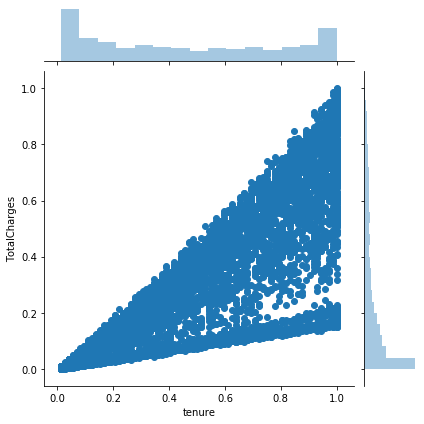

In [103]:
sns.jointplot(x='tenure',y='TotalCharges',data=df,kind="scatter")

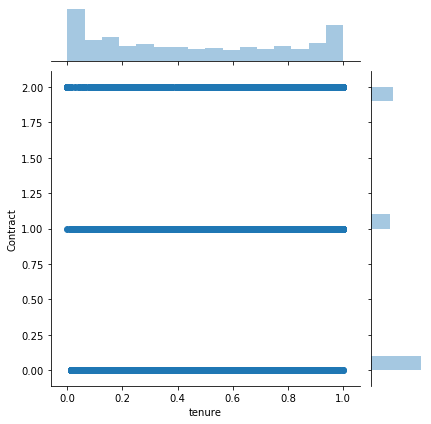

In [104]:
sns.jointplot(x='tenure',y='Contract',data=df,kind="scatter")

In [105]:
corr_matrix['TotalCharges'].sort_values(ascending=False)

TotalCharges        1.000000
tenure              0.825880
MonthlyCharges      0.651065
MultipleLines       0.453202
Contract            0.450306
StreamingMovies     0.398088
StreamingTV         0.392472
DeviceProtection    0.389066
OnlineBackup        0.375556
Partner             0.319072
TechSupport         0.276890
OnlineSecurity      0.254473
PaperlessBilling    0.157830
SeniorCitizen       0.102411
Dependents          0.064653
gender              0.000048
Churn              -0.199484
PaymentMethod      -0.330594
Name: TotalCharges, dtype: float64

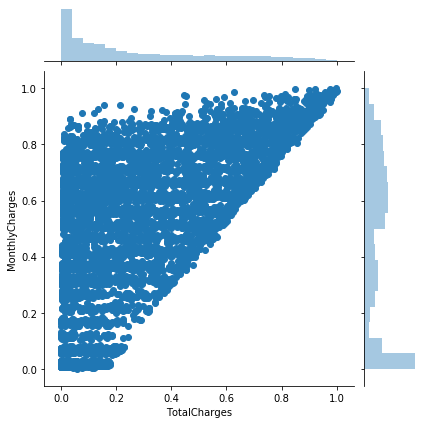

In [106]:
sns.jointplot(x='TotalCharges',y='MonthlyCharges',data=df,kind="scatter")

In [107]:
df1.drop(['TotalCharges'],axis=1,inplace=True)

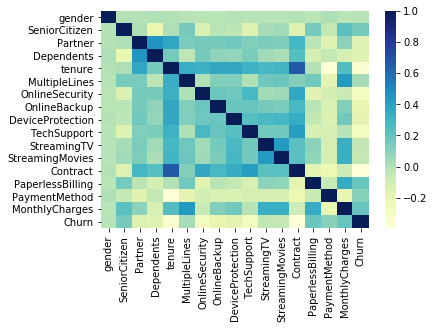

In [108]:
sns.heatmap(df1.corr(), cmap="YlGnBu")

In [109]:
x=df1.drop(['Churn'],axis=1)
y=df1['Churn']

In [110]:
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier


In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=24)


# Logistic regression algorithm

select prameters

In [113]:
log_param_grid={'C':[0.1,0.5,1.0,1.5],'random_state':[0,1,2,3],'max_iter':[50,100,150,200]}

log_reg=LogisticRegression()
log_grid_search=GridSearchCV(log_reg,log_param_grid,cv=5,scoring='neg_mean_squared_error')

log_grid_search.fit(x_train,y_train)
log_grid_search.best_params_

{'C': 0.5, 'max_iter': 50, 'random_state': 0}

In [114]:
lr = LogisticRegression(C=0.5,random_state=0,max_iter=50)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
acc=accuracy_score(y_test, y_pred)
print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

[Logistic regression algorithm] accuracy_score: 0.816.


In [115]:
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:",cm)
print(classification_report(y_test, y_pred))

confusion matrix: [[1432  153]
 [ 236  292]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1585
           1       0.66      0.55      0.60       528

    accuracy                           0.82      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.81      0.82      0.81      2113



AUC: 0.85


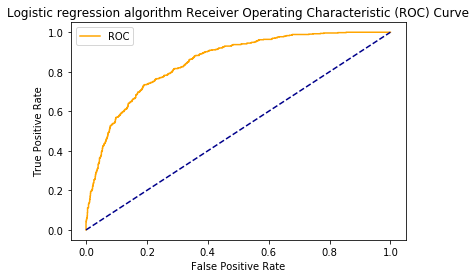

In [117]:
probs = lr.predict_proba(x_test)[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic regression algorithm Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# k-NN classifier

select prameters

In [118]:
KNeighborsClassifier().get_params().keys()

knn_param_grid={'n_neighbors':[2,4,6,8,10.12],'leaf_size':[10,20,30,40,50]}

knn_reg=KNeighborsClassifier()
knn_grid_search=GridSearchCV(knn_reg,knn_param_grid,cv=5,scoring='neg_mean_squared_error')

knn_grid_search.fit(x_train,y_train)
knn_grid_search.best_params_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selec

{'leaf_size': 10, 'n_neighbors': 6}

In [119]:
knn = KNeighborsClassifier(n_neighbors=6,leaf_size=10)

# Fit the classifier to the data
knn.fit(x_train,y_train)

# Predict the labels for the training data X
y_pred = knn.predict(x_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(x_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

[K-Nearest Neighbors (KNN)] knn.score: 0.769.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.769.


In [120]:
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:",cm)
print(classification_report(y_test, y_pred))

confusion matrix: [[1414  171]
 [ 318  210]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1585
           1       0.55      0.40      0.46       528

    accuracy                           0.77      2113
   macro avg       0.68      0.64      0.66      2113
weighted avg       0.75      0.77      0.75      2113



AUC: 0.77


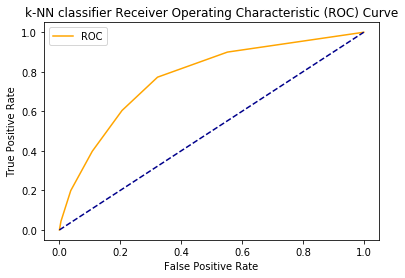

In [121]:
probs = knn.predict_proba(x_test)[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('k-NN classifier Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Decision tree algorithm

In [122]:
dt_param_grid={'criterion':('gini', 'entropy'),'max_depth':[2,4,6,8,10.12],'random_state':[1,2,3]}

dt_reg=DecisionTreeClassifier()
dt_grid_search=GridSearchCV(dt_reg,dt_param_grid,cv=5,scoring='neg_mean_squared_error')

dt_grid_search.fit(x_train,y_train)
dt_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'random_state': 1}

In [123]:
dt = DecisionTreeClassifier(max_depth=6, criterion='entropy', random_state=1)


# Fit dt_entropy to the training set
dt.fit(x_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt.predict(x_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)


# Print accuracy_entropy
print('[Decision Tree -- accuracy_score: {:.3f}.'.format(accuracy_entropy))


[Decision Tree -- accuracy_score: 0.798.


In [124]:
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:",cm)
print(classification_report(y_test, y_pred))

confusion matrix: [[1442  143]
 [ 284  244]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1585
           1       0.63      0.46      0.53       528

    accuracy                           0.80      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.78      0.80      0.79      2113



AUC: 0.82


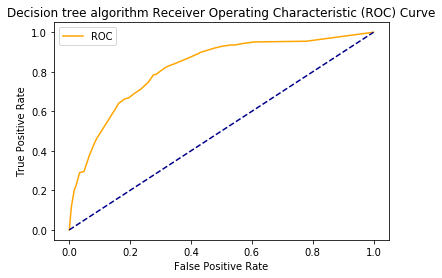

In [125]:
probs = dt.predict_proba(x_test)[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision tree algorithm Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Random Forest algorithm

In [126]:
RandomForestClassifier().get_params().keys()

rf_param_grid={'n_estimators':[60,70,80,90,100,110,120,130],'max_features':('auto', 'log2')}

rf_reg=RandomForestClassifier()
rf_grid_search=GridSearchCV(rf_reg,rf_param_grid,cv=5,scoring='neg_mean_squared_error')

rf_grid_search.fit(x_train,y_train)
rf_grid_search.best_params_

{'max_features': 'auto', 'n_estimators': 130}

In [127]:
#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=130, max_features='auto')

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(x_train,y_train)

y_pred=rf.predict(x_test)


# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))

[Randon forest algorithm] accuracy_score: 0.807.


In [128]:
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:",cm)
print(classification_report(y_test, y_pred))

confusion matrix: [[1447  138]
 [ 269  259]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1585
           1       0.65      0.49      0.56       528

    accuracy                           0.81      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.80      0.81      0.80      2113



AUC: 0.82


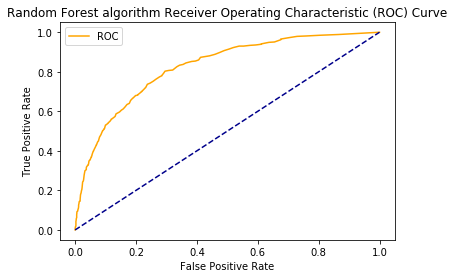

In [129]:
probs = rf.predict_proba(x_test)[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest algorithm Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [130]:
feature_imp = pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)

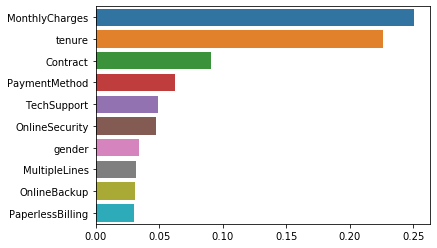

In [131]:
# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])

In [132]:
sfm = SelectFromModel(rf, threshold=0.03)

In [133]:
# Train the selector
sfm.fit(x_train, y_train)

feat_labels=x.columns

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

gender
tenure
MultipleLines
OnlineSecurity
OnlineBackup
TechSupport
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges


In [134]:
x_important_train = sfm.transform(x_train)
x_important_test = sfm.transform(x_test)

In [135]:
clf_important = RandomForestClassifier(n_estimators=120, random_state=0, n_jobs=-1)
clf_important.fit(x_important_train, y_train)
y_pred = rf.predict(x_test)
print('[Randon forest algorithm -- Full feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_pred)))


[Randon forest algorithm -- Full feature] accuracy_score: 0.807.


# Support Vector Machines

In [136]:
svc_param_grid={'kernel':('linear','poly','rbf','sigmoid'),'C':[0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3],'gamma':('auto', 'scale'),'degree':[1,2,3]}

svc_reg=SVC()
svc_grid_search=GridSearchCV(svc_reg,svc_param_grid,cv=5,scoring='neg_mean_squared_error')

svc_grid_search.fit(x_train,y_train)
svc_grid_search.best_params_

{'C': 0.6, 'degree': 1, 'gamma': 'auto', 'kernel': 'linear'}

In [137]:
clf=SVC(kernel='linear',degree=1,C=0.6)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)


# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Model Accuracy, how often is the classifier correct?
print("[Support Vector Machines algorithm] accuracy_score: {:.3f}.".format(acc))


[Support Vector Machines algorithm] accuracy_score: 0.809.


In [138]:
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:",cm)
print(classification_report(y_test, y_pred))

confusion matrix: [[1406  179]
 [ 224  304]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1585
           1       0.63      0.58      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



# Naive Bayes

In [139]:
clf=GaussianNB()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)


# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Model Accuracy, how often is the classifier correct?
print("[Naive Bayes algorithm] accuracy_score: {:.3f}.".format(acc))


[Naive Bayes algorithm] accuracy_score: 0.756.


In [140]:
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:",cm)
print(classification_report(y_test, y_pred))


confusion matrix: [[1209  376]
 [ 139  389]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1585
           1       0.51      0.74      0.60       528

    accuracy                           0.76      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.80      0.76      0.77      2113



AUC: 0.83


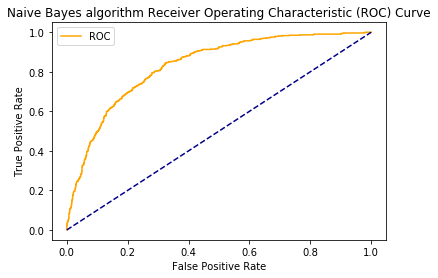

In [141]:
probs = clf.predict_proba(x_test)[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes algorithm Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Linear Discriminant Analysis

In [142]:
LDA().get_params().keys()

lda_param_grid={'solver':('svd','lsqr','eigen'),'n_components':[1,2,3,4,5,6,7,8]}

lda_reg=LDA()
lda_grid_search=GridSearchCV(lda_reg,lda_param_grid,cv=5,scoring='neg_mean_squared_error')

lda_grid_search.fit(x_train,y_train)
lda_grid_search.best_params_

/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(16, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(16, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components >

/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(16, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(16, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components >

/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(16, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(16, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components >

/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(16, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/discrim

/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(16, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(16, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components >

{'n_components': 1, 'solver': 'svd'}

In [143]:
clf=LDA(n_components=1,solver='svd')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)


# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Model Accuracy, how often is the classifier correct?
print("[Linear Discriminant Analysis algorithm] accuracy_score: {:.3f}.".format(acc))


[Linear Discriminant Analysis algorithm] accuracy_score: 0.811.


In [144]:
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:",cm)
print(classification_report(y_test, y_pred))

confusion matrix: [[1417  168]
 [ 231  297]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1585
           1       0.64      0.56      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



AUC: 0.85


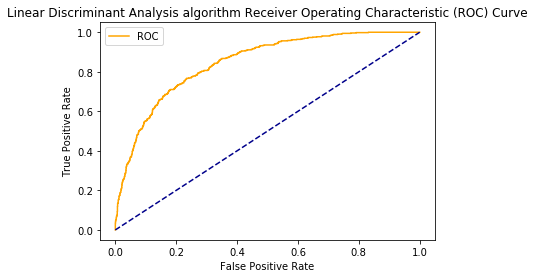

In [145]:
probs = clf.predict_proba(x_test)[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear Discriminant Analysis algorithm Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# MLPClassifier

In [147]:
clf=MLPClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)


# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Model Accuracy, how often is the classifier correct?
print("[MLPClassifier algorithm] accuracy_score: {:.3f}.".format(acc))

[MLPClassifier algorithm] accuracy_score: 0.797.


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [148]:
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:",cm)
print(classification_report(y_test, y_pred))

confusion matrix: [[1416  169]
 [ 259  269]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1585
           1       0.61      0.51      0.56       528

    accuracy                           0.80      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113



AUC: 0.83


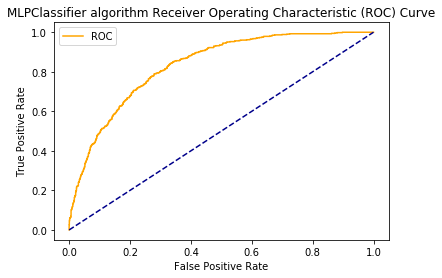

In [149]:
probs = clf.predict_proba(x_test)[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLPClassifier algorithm Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()